

<center>

## Importing Libraries


</center>

In [2]:
# Load the dataset and Import Libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_csv(r'c:\Users\User\Documents\marketing_campaign_dataset.csv')

In [ ]:
# Display the first few rows
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05




<center>

## Data Cleaning and Preprocessing


</center>

In [ ]:
# Checking data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [6]:
# Correcting data types
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
# Summary statistics for numerical columns
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [ ]:
# Summary Stats for Categorcal columns
df.describe(include = 'object')

,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Acquisition_Cost,Location,Language,Customer_Segment,Date
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,5,5,5,4,6,15001,5,5,5,365
top,TechCorp,Influencer,Men 18-24,30 days,Email,"$16,578.00",Miami,Mandarin,Foodies,2021-01-01
freq,40237,40169,40258,50255,33599,32,40269,40255,40208,548


In [ ]:
# Check for missing values
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [ ]:
# Check for duplicates 
df.duplicated().sum()

0

In [7]:
# removing $ from 'Acquisition_Cost' columns
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

# checking
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [8]:
# Split gender and age range
def split_target(row):
    if "All Ages" in row:
        return pd.Series(["All", None])
    parts = row.split()
    return pd.Series([parts[0], parts[1]])

df[['Gender', 'Age_Range']] = df['Target_Audience'].apply(split_target)


In [9]:
# checking
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Gender,Age_Range
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,Men,18-24
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,Women,35-44
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,Men,25-34
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,All,None
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,Men,25-34


In [10]:
# Drop target Audience column
df.drop('Target_Audience', axis=1, inplace=True)


In [11]:
# checking 
df.head()

,Campaign_ID,Company,Campaign_Type,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Gender,Age_Range
0,1,Innovate Industries,Email,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,Men,18-24
1,2,NexGen Systems,Email,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,Women,35-44
2,3,Alpha Innovations,Influencer,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,Men,25-34
3,4,DataTech Solutions,Display,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,All,None
4,5,NexGen Systems,Email,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,Men,25-34


In [12]:
# Convert categorical columns to 'category' dtype
cat_cols = ['Campaign_Type', 'Gender', 'Location', 'Language', 'Customer_Segment', 'Company','Duration', 'Channel_Used', 'Age_Range']
df[cat_cols] = df[cat_cols].astype('category')



<center>

## Data Vizualisations and Exploratory Data Analysis (EDA)
</center>


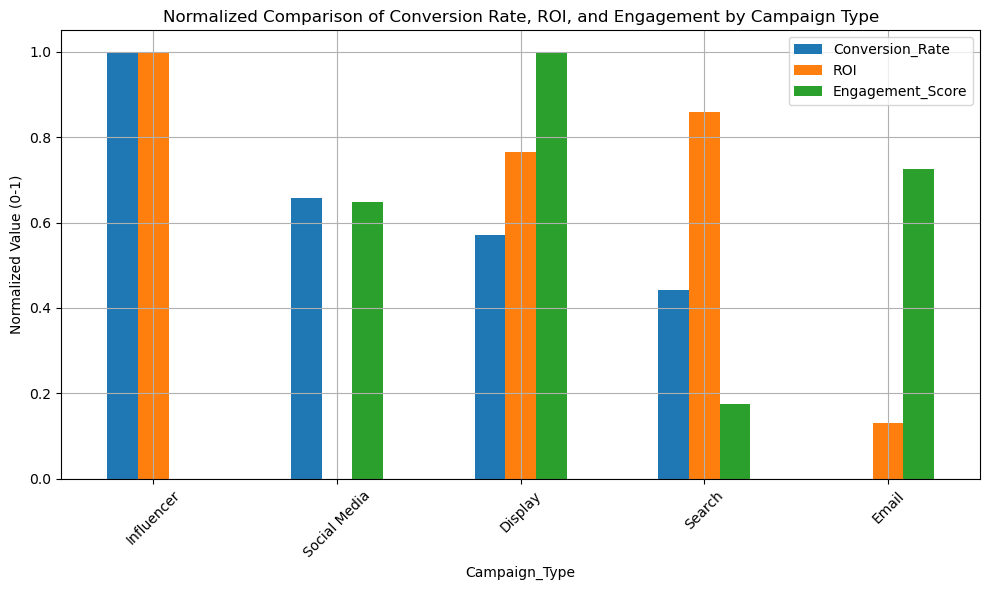

In [4]:
metrics = df.groupby('Campaign_Type')[['Conversion_Rate', 'ROI', 'Engagement_Score']].mean()
normalized = (metrics - metrics.min()) / (metrics.max() - metrics.min())

normalized.sort_values(by='Conversion_Rate', ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Normalized Comparison of Conversion Rate, ROI, and Engagement by Campaign Type")
plt.ylabel("Normalized Value (0-1)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


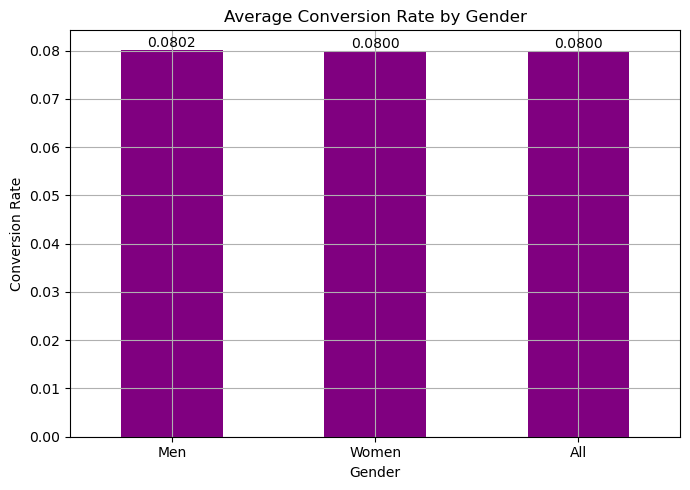

In [14]:
ax = df.groupby('Gender')['Conversion_Rate'].mean().sort_values(ascending=False).plot(
    kind='bar', color='purple', figsize=(7,5)
)
plt.title("Average Conversion Rate by Gender")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=0)
plt.grid(True)

# Add text labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')

plt.tight_layout()
plt.show()


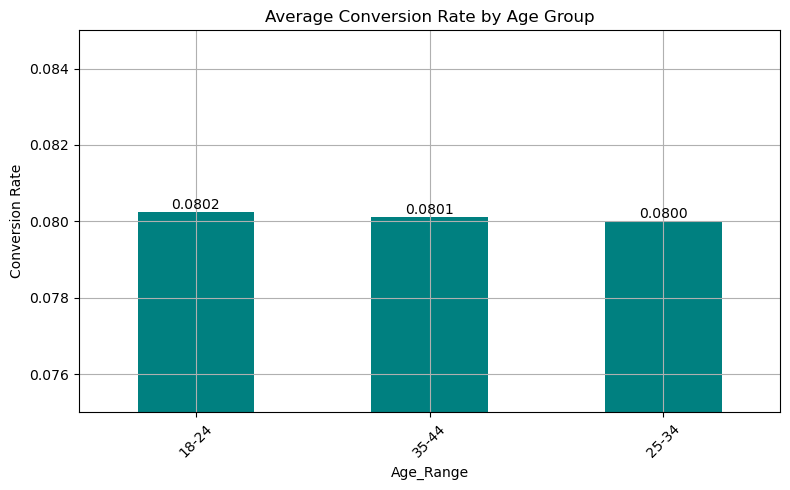

In [ ]:
# Group and plot conversion rate by age range
ax = df.groupby('Age_Range')['Conversion_Rate'].mean().sort_values(ascending=False).plot(
    kind='bar', color='teal', figsize=(8,5)
)

plt.title("Average Conversion Rate by Age Group")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.grid(True)

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')

plt.ylim(0.075, 0.085)  # Adjust range based on your actual values

plt.tight_layout()
plt.show()


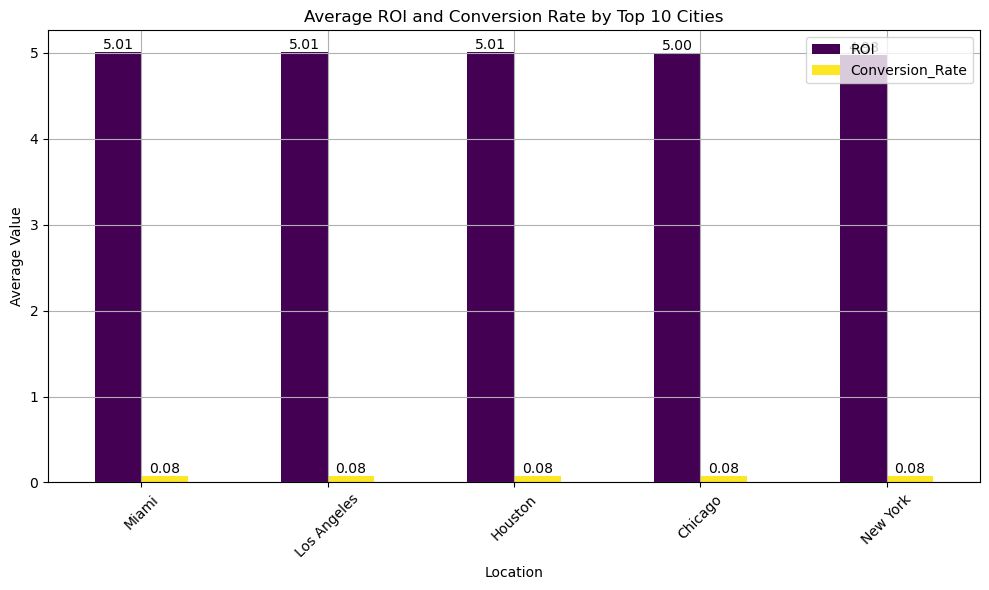

In [ ]:
# Get top 10 cities by number of campaigns 
top_cities = df['Location'].value_counts().head(10).index
city_df = df[df['Location'].isin(top_cities)]

# Plot average ROI and Conversion Rate by City
metrics_by_city = city_df.groupby('Location')[['ROI', 'Conversion_Rate']].mean().sort_values(by='ROI', ascending=False)

ax = metrics_by_city.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Average ROI and Conversion Rate by Top 10 Cities")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(True)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()


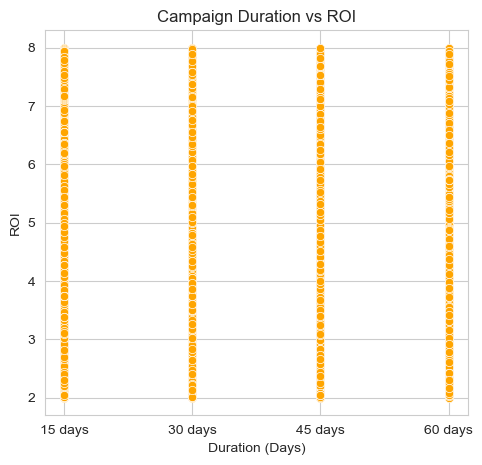

In [ ]:
# ROI vs Duration
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Duration', y='ROI', data=df, color='orange')
plt.title("Campaign Duration vs ROI")
plt.xlabel("Duration (Days)")
plt.ylabel("ROI")
plt.grid(True)




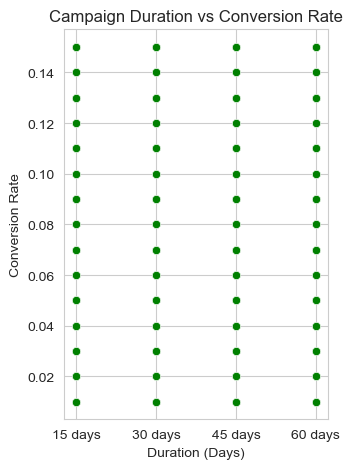

In [23]:
# Conversion Rate vs Duration
plt.subplot(1, 2, 2)
sns.scatterplot(x='Duration', y='Conversion_Rate', data=df, color='green')
plt.title("Campaign Duration vs Conversion Rate")
plt.xlabel("Duration (Days)")
plt.ylabel("Conversion Rate")
plt.grid(True)

plt.tight_layout()
plt.show()

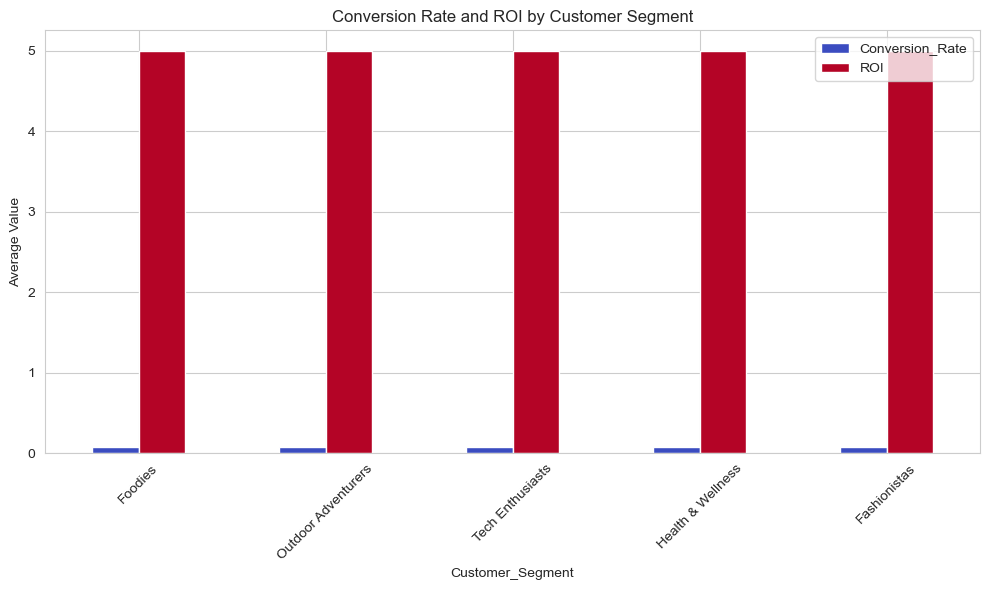

In [25]:
df.groupby('Customer_Segment')[['Conversion_Rate', 'ROI']].mean().sort_values(by='Conversion_Rate', ascending=False).plot(
    kind='bar', figsize=(10,6), colormap='coolwarm'
)
plt.title("Conversion Rate and ROI by Customer Segment")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
